<div style="background-color: #1DA1F2; padding: 20px;"><b><h1> Descifrando el lenguaje emocional en Twitter: Un análisis predictivo basado en aprendizaje automático. </h1></b></div>

**Autor**: Neivys Luz González Gómez

La identificación de emociones es una tarea fundamental en el campo del procesamiento de lenguaje natural, que se enfoca en clasificar textos según su tono emocional. A pesar de que el objetivo es identificar una amplia variedad de emociones humanas, la mayoría de los conjuntos de datos disponibles se limitan a las polaridades positiva, negativa y, en ocasiones, neutral.

Detectar emociones a partir de textos es un reto complejo en el procesamiento del lenguaje natural, ya que se trata de un problema de clasificación multiclase y, en muchas ocasiones, no hay suficientes datos etiquetados disponibles. Sin embargo, este conjunto de datos etiquetado proporciona la oportunidad de aplicar diversas técnicas de análisis exploratorio y modelado para entender mejor la dinámica emocional en las redes sociales y mejorar la capacidad de detección en tiempo real.

El conjunto de datos de emociones se obtiene a partir de mensajes en inglés de Twitter y contiene seis emociones básicas: neutralidad, preocupación, felicidad, tristeza, amor, sorpresa, diversión, alivio, odio, vacío, entusiasmo y aburrimiento. Este conjunto de datos ofrece una variedad más amplia de emociones humanas, lo que permite el entrenamiento y la evaluación de modelos de análisis de sentimientos con mayor precisión y exhaustividad.

<div class="alert alert-info alert-info"><b><h3>Objetivo General</h3></b>
    
**Desarrollar un modelo que permita detectar emociones en los tweets y analizar patrones en el lenguaje utilizado en Twitter para ayudar en la detección temprana de trastornos emocionales como la depresión, la ansiedad, entre otros.**
</div>

---

# Notebook N° 4: Modelo ML Clasificación - Emociones catalogadas 

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
</div>

Se dispone de un conjunto de datos proveniente de data.world, una plataforma que proporciona acceso a conjuntos de datos públicos. Este dataset consiste en una colección de tweets etiquetados con la emoción que expresan. Contiene cuatro columnas que incluyen el identificador del tweet, el sentimiento expresado, el autor y el contenido del tweet. En total, se tienen 40,000 registros con anotaciones para 13 emociones distintas. 

<img src="Notebook.jpg">

---

In [1]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

#import NLTK
import nltk
nltk.download('punkt') #Punkt es una biblioteca que se utiliza para tokenizar frases en lenguaje natural
nltk.download('stopwords') # library "stopwords"
nltk.download('wordnet') # 
nltk.download('omw-1.4') #
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#import librerias de pre-procesamiento y normalizacion
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.tag import pos_tag

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#Librerias de sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer
import sklearn.preprocessing as preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE

---

<div class="alert alert-block alert-info">
<b><h2> Cargar Dataset.</h2></b> 
</div>

In [3]:
df = pd.read_pickle('C:/Users/Lenovo/Documents/Barcelona/IT/Data/Proyecto/dataset1.pickle')

In [4]:
df

,content,sentiment_label
0,layin bed headache ughhhhwaitin call,9
1,funeral ceremonygloomy friday,9
2,want hang friend soon,2
3,want trade someone houston ticket one,7
4,repinging didnt go prom bc bf didnt like friend,11
...,...,...
38983,succesfully following tayla,4
38984,happy mother day love,6
38985,happy mother day mommy woman man long youre mo...,6
38986,wassup beautiful follow peep new hit single ww...,4


## 1. Preparación del Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38988 entries, 0 to 38987
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   content          38988 non-null  object
 1   sentiment_label  38988 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 457.0+ KB


### 1.1 Verificar nulos y NaM

In [6]:
df.isnull().sum()

content            0
sentiment_label    0
dtype: int64

In [7]:
df.isna().sum()

content            0
sentiment_label    0
dtype: int64

<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.  
   *  Las variables de importancia para el estudio son del tipo objeto. 
   *  El dataset posee 40000 filas y 4 columnas.

## 2. Modelo

### 2.1 Se define el target y la feature

In [8]:
# Se define el target y la feature
X = df['content']
y = df['sentiment_label']

In [9]:
y.value_counts()

7     8503
11    8439
4     5204
9     5157
6     3837
10    2180
3     1775
8     1524
5     1321
2      759
1      179
0      110
Name: sentiment_label, dtype: int64

In [10]:
X.head()

0               layin bed headache ughhhhwaitin call
1                      funeral ceremonygloomy friday
2                              want hang friend soon
3              want trade someone houston ticket one
4    repinging didnt go prom bc bf didnt like friend
Name: content, dtype: object

In [11]:
# Separamos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27291,)
X_test shape: (11697,)
y_train shape: (27291,)
y_test shape: (11697,)


### 2.2 Vectorización

En la actualidad, contamos con cada texto registrado en formato de cadena, lo cual no es útil para nuestros modelos. Para poder trabajar con ellos, debemos transformar cada registro en un vector. Para mejorar la precisión del modelo de clasificación multitarget, se utilizaran dos técnicas de vectorización de texto: **CountVectorizer** y **TF-IDF**. 

La técnica bag-of-words cuenta la frecuencia de cada palabra en un documento, mientras que TF-IDF pondera las palabras según su importancia en un documento. Al utilizar ambas técnicas, se espera capturar tanto la frecuencia como la importancia de las palabras en el texto, lo que debería mejorar la capacidad del modelo para identificar patrones y realizar predicciones precisas en los datos de prueba."

* **CountVectorizer**

In [13]:
# Tokenizer to remove unwanted elements from our data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Fit the CountVectorizer to the training data
cv = CountVectorizer(lowercase=False, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
X_train_vec = cv.fit_transform(X_train)

# Transform the test data using the same CountVectorizer object
X_test_vec = cv.transform(X_test)
X_vec = cv.fit_transform(X)

* **TF-IDF**

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
# We are using transformer here
tfidf = TfidfTransformer()

tfidf.fit(X_train_vec)
X_train_tfidf = tfidf.transform(X_train_vec)
X_test_tfidf = tfidf.transform(X_test_vec)

### 2.3 Evaluación de modelos.

In [15]:
# Seleccionar los mejores modelos a evaluar
classifiers = [
    SVC(),
    SGDClassifier(),
    MultinomialNB(),
    BernoulliNB(),
    XGBClassifier(),
]

In [16]:
score_mean = []
score_std = []

for classifier in classifiers:
    scores = cross_val_score(classifier, X_vec , y, cv=5, scoring='accuracy')
    score_mean.append(scores.mean())
    score_std.append(scores.std())
    print(f'{type(classifier).__name__}: {scores.mean()}')

SVC: 0.345798821157663
SGDClassifier: 0.3120190313956318
MultinomialNB: 0.3138150411524441
BernoulliNB: 0.29839972384667457
XGBClassifier: 0.3420285019626156


In [17]:
tabla = pd.DataFrame({
    'model': ['SVC', 'SGDClassifier', 'MultinomialNB', 'BernoulliNB', 'XGBClassifier'],
    'acc_cv': score_mean,
    'acc_std_cv': score_std
})

In [18]:
tabla

,model,acc_cv,acc_std_cv
0,SVC,0.345799,0.023585
1,SGDClassifier,0.312019,0.018613
2,MultinomialNB,0.313815,0.027019
3,BernoulliNB,0.298400,0.017389
4,XGBClassifier,0.342029,0.023186


Los resultados de los modelos evaluados muestran una precisión media que oscila entre el 29.8% y el 34.5%, con una desviación estándar que varía desde el 1.7% hasta el 2.7%. El modelo que presentó la mayor precisión media fue el SVC, seguido por el XGBClassifier y el MultinomialNB. Por otro lado, el modelo que presentó la menor precisión media fue el BernoulliNB. 

Estos resultados indican que los modelos de clasificación evaluados no logran una precisión elevada en la tarea de clasificación de emociones de tweets, lo que sugiere que podrían ser necesarios ajustes en los parámetros de los modelos o en la selección de variables utilizadas en el modelo para mejorar el rendimiento. Además, es importante tener en cuenta que otros factores, como el equilibrio de clases y el costo de los errores, también pueden ser importantes para considerar en la selección del modelo adecuado.

## 3. Creación y predicción del modelo base

In [19]:
pipe_model = Pipeline([('vector', CountVectorizer()), 
                 ('tfidf', TfidfTransformer()),  
                 ('model', SVC())])

In [20]:
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.34359237411302046


<AxesSubplot:>

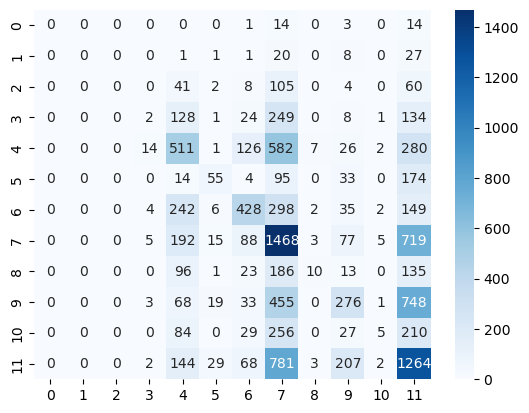

In [21]:
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [22]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00       220
           3       0.07      0.00      0.01       547
           4       0.34      0.33      0.33      1549
           5       0.42      0.15      0.22       375
           6       0.51      0.37      0.43      1166
           7       0.33      0.57      0.41      2572
           8       0.40      0.02      0.04       464
           9       0.38      0.17      0.24      1603
          10       0.28      0.01      0.02       611
          11       0.32      0.51      0.39      2500

    accuracy                           0.34     11697
   macro avg       0.25      0.18      0.17     11697
weighted avg       0.34      0.34      0.30     11697



In [23]:
# Calcula el F1-score
f1 = f1_score(y_test, y_pred, average='weighted', labels=[1])
f1

0.0

Los resultados del modelo son bastante bajos, ya que la precisión, el recall y el F1-score son muy bajos para la mayoría de las clases. Además, la precisión y el recall son bastante desequilibrados, lo que sugiere que el modelo está teniendo dificultades para clasificar algunas clases. La exactitud general del modelo es del 34%, lo que indica que el modelo tiene dificultades para clasificar correctamente las diferentes clases de emociones en el conjunto de datos.

El F1-score es una medida que combina tanto la precisión como la sensibilidad. Si alguno de estos valores es cero, el resultado de F1-score también será cero. Por lo tanto, en este caso, el F1-score es cero debido a que el modelo no pudo predecir correctamente las clases mencionadas anteriormente.

## 4.  Hiperparametos (Mejores parametros)

In [24]:
pipeline = Pipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),  
        ('model', SVC())
    ]
)

parameters = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print('score', grid_search.score(X_test, y_test))
print('-----')

print('GridSearchCV:')
y_pred = grid_search.predict(X_test)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

# Print Confusion Matrix
labels = np.unique(y_test)
cm =  confusion_matrix(y_test, y_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
score 0.34453278618449173
-----
GridSearchCV:
Best score: 0.347
Best parameters set:
	model__C: 1
	model__kernel: 'linear'


,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,1,1,14,1,3,0,12
1,0,0,0,0,3,1,2,17,1,12,0,22
2,0,0,0,1,56,2,8,92,0,8,2,51
3,0,0,0,12,153,1,27,200,3,19,3,129
4,0,0,0,25,594,4,136,476,12,46,7,249
5,0,0,0,1,15,68,4,80,0,45,0,162
6,0,0,0,12,259,5,452,253,8,48,8,121
7,0,0,0,11,302,19,95,1298,10,140,12,685
8,0,0,0,2,102,1,28,157,20,26,1,127
9,0,0,0,8,90,32,39,401,2,377,3,651


In [25]:
# model with best parameters

pipeline = Pipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),  
        ('model', SVC(C = 1, kernel= 'linear'))
    ]
)

pipeline.fit(X_train, y_train)
print('Accuracy score: {0:.5f}'.format(pipeline.score(X_test, y_test)))

y_pred = pipeline.predict(X_test)

Accuracy score: 0.34


<AxesSubplot:>

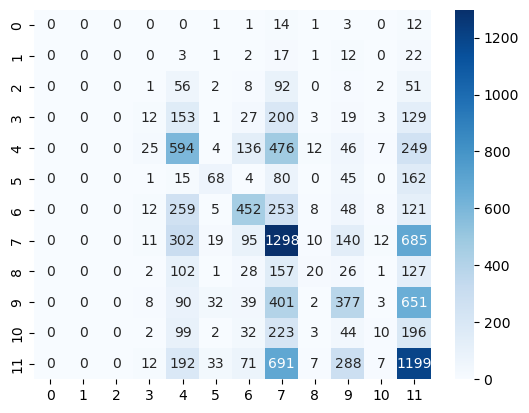

In [26]:
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [27]:
# model with best parameters with CV

# Crear el pipeline con los pasos de preprocesamiento y el modelo
pipeline = Pipeline([
    ('vector', CountVectorizer(lowercase=False)), 
    ('tfidf', TfidfTransformer()),  
    ('model', SVC(C=1, kernel='linear'))
])

# Calcular la puntuación de precisión usando cross-validation con 5 folds
score = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Imprimir la puntuación media de precisión
print('Accuracy score: {0:.2f}'.format(score.mean()))

Accuracy score: 0.34


## 5.  Balanceo de la data (Smote SKleaern)

In [31]:
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline_sm = ImbPipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),
        ('smote', ImbPipeline([
            ('smote', SMOTE(random_state=42)),
            ('model', SVC(C = 1, kernel= 'linear'))
        ]))
    ]
)

score = cross_val_score(pipeline_sm, X, y, cv=5, scoring='accuracy')
print('Accuracy score: {0:.4f}'.format(score.mean()))

Accuracy score: 0.27


## 6. Observaciones generales

* El objetivo de este notebook fue evaluar varios modelos de clasificación de emociones en tweets y seleccionar el mejor para predecir las emociones en nuevos tweets. Se evaluaron cinco modelos diferentes y se encontró que SVC era el mejor de ellos, con una precisión promedio de 0,345799 en la validación cruzada.

* Se creó una pipeline para SVC y se encontró que el modelo tenía una precisión de 0,34359237411302046 en los datos de prueba. Se utilizó GridSearchCV para encontrar los mejores hiperparámetros para el modelo y se encontró que los mejores parámetros eran un valor de C de 1 y un kernel lineal.

* Se creó una pipeline con los mejores parámetros y se utilizó la validación cruzada para evaluar la precisión media del modelo, que fue de 0,34. Además, se intentó mejorar la precisión utilizando SMOTE de SKLearn para balancear los datos, pero se encontró que la precisión disminuyó a 0,27.

* En resumen, se podría decir que se necesitan mejoras significativas en el modelo para aumentar su precisión y rendimiento en la clasificación de emociones en tweets. Además, podría ser necesario explorar otras técnicas de preprocesamiento y modelado para mejorar los resultados.